출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까?
– 2023년 03월 교통카드 통계자료를 사용.
– 지하철 시간대별 이용현황 sheet를 사용.
– 출근시간은 오전 7시~9시로 한다.
– 출근시간 최대 승차역 30개를 추출하고, 승객수로 정렬하여, 이를 막대 그래프로 표현.
– 출근시간 최대 하차역 30개를 추출하고, 승객수로 정렬하여, 이를 막대 그래프로 표현.
– 출근시간 최대 승하차역 30개를 추출하고, 승객수로 정렬하여, 이를 막대 그래프로 표현.
– 데이터 시각화를 통한 분석 결과를 설명하시오. (문제에 대한 답)
– csv 파일, 그래프, 출력 형식 등 자유 선택 가능.
– 단, 그래프와 출력 결과의 Accuracy and Quality로 평가.

In [5]:
print(list(sorted([1,2,3,6,7,8,1,2,3])))

[1, 1, 2, 2, 3, 3, 6, 7, 8]


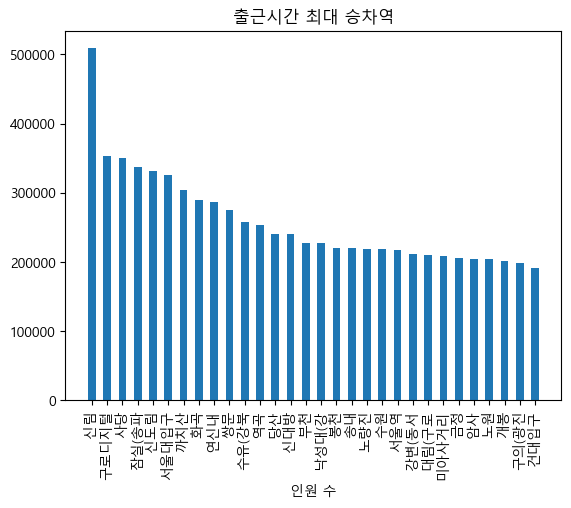

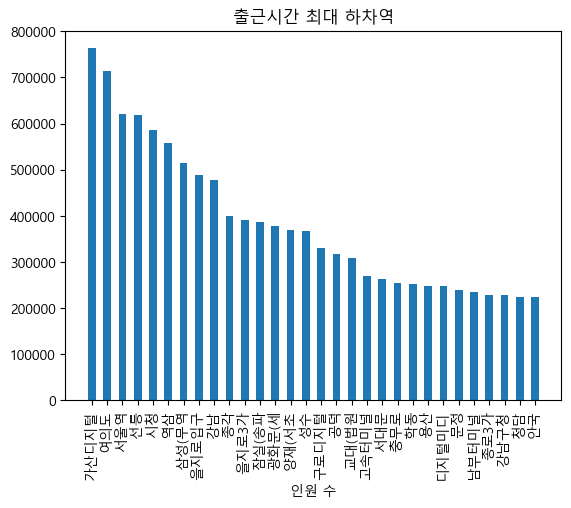

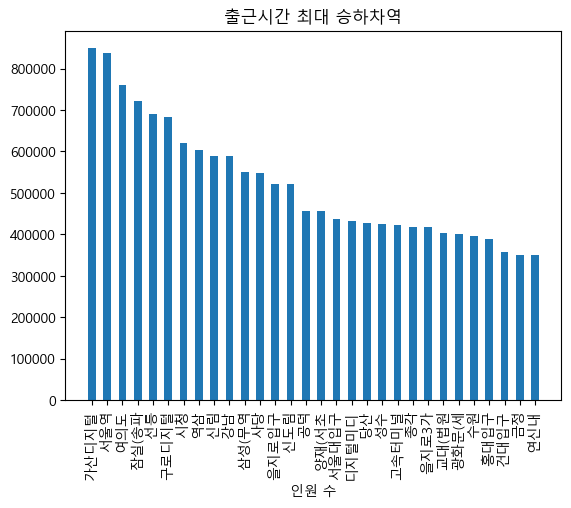

In [18]:
import csv
import matplotlib.pyplot as plt

def main():
#need to be changed
    file="q4_1.csv"
    f=open(file,'r',encoding='cp949')
    data=csv.reader(f,delimiter=",")
    
    head=next(data)
    head2=next(data)
    #역이름 key, 0 승차 1 하차
    stationDict={}
    for d in data:
        d6to9=d[:14]
        #0 ->년월 1 ->호선 2->id 3->역이름 4->6시승차 5->6시하차 6->7시 승차 ....
        ride=int(d6to9[-4])+int(d6to9[-2])
        getoff=int(d6to9[-3])+int(d6to9[-1])
        sums=getoff+ride
        if d[3] in stationDict :
            #승차
            stationDict[d6to9[3]][0]+=ride
            #하차
            stationDict[d6to9[3]][1]+=getoff
            #승하차
            stationDict[d6to9[3]][2]+=sums
        else:
            stationDict[d6to9[3]]=[ride,getoff,sums]

    f.close()

    riders=sorted(list(stationDict.items()),key=lambda x:x[1][0],reverse=True)[:30]
    ridersStation,ridersHeight=[height[0][:5] for height in riders],[height[1][0] for height in riders]

    getoffs=sorted(list(stationDict.items()),key=lambda x:x[1][1],reverse=True)[:30]
    getoffsStation,getoffsHeight=[height[0][:5] for height in getoffs],[height[1][1] for height in getoffs]

    workers=sorted(list(stationDict.items()),key=lambda x:x[1][2],reverse=True)[:30]
    workersStation,workersHeight=[height[0][:5] for height in workers],[height[1][2] for height in workers]

    plt.rc("font",family="Malgun Gothic")
    plt.rcParams['axes.unicode_minus']=False
    plt.title("출근시간 최대 승차역")
    plt.xlabel("역이름")
    plt.xlabel("인원 수")
    plt.bar(ridersStation,ridersHeight,width=0.5)
    plt.xticks(ridersStation,rotation=90)
    plt.show()
    
    plt.rc("font",family="Malgun Gothic")
    plt.rcParams['axes.unicode_minus']=False
    plt.title("출근시간 최대 하차역")
    plt.xlabel("역이름")
    plt.xlabel("인원 수")
    plt.bar(getoffsStation,getoffsHeight,width=0.5)
    plt.xticks(getoffsStation,rotation=90)    
    plt.show()

    plt.rc("font",family="Malgun Gothic")
    plt.rcParams['axes.unicode_minus']=False
    plt.title("출근시간 최대 승하차역")
    plt.xlabel("역이름")
    plt.xlabel("인원 수")
    plt.bar(workersStation,workersHeight,width=0.5)
    plt.xticks(workersStation,rotation=90)    
    plt.show()
    
    




if __name__ == "__main__":
    main()